In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


## Loading the Data

In [14]:
url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" # confirmed cases day by day
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv" # deaths
url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv" # recovery day by day

covid_confirmed = pd.read_csv(url1) # main df to work with
covid_death = pd.read_csv(url2) 
covid_recovered = pd.read_csv(url3)

print(covid_death.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...     7896    7896    7896    7896   
1        0        0        0        0  ...     3598    3598    3598    3598   
2        0        0        0        0  ...     6881    6881    6881    6881   
3        0        0        0        0  ...      165     165     165     165   
4        0        0        0        0  ...     1933    1933    1933    1933   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896   

In [15]:
covid_confirmed[covid_confirmed['Country/Region'] == 'US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
260,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702


#### Very few null entries, whereas there are a lot of columns for each day
Lets zoom in on a country in particular, the US

In [16]:
df_us = covid_confirmed[covid_confirmed['Country/Region'] == 'US'].drop(columns=['Lat', 'Long', 'Country/Region', 'Province/State'], errors='ignore') # drop columns that are not necessary 
daily_cases = df_us.sum(axis=0).diff().fillna(0) # difference of cases from col to col
daily_cases.index = pd.to_datetime(daily_cases.index) # columns to actual datetime objects, proper date handling for plotting and modelling
daily_cases = daily_cases.to_frame(name='new_cases_diff_by_day') # daily cases series to df w single col named new_cases

/var/folders/4j/19x2d6rx45sdx8r26vhj6str0000gn/T/ipykernel_30471/4202040389.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_cases.index = pd.to_datetime(daily_cases.index) # columns to actual datetime objects, proper date handling for plotting and modelling


In [33]:
df_us_cumulative = df_us.sum(axis=0) # add all US rows, cumulative sum
df_us_cumulative.index = pd.to_datetime(df_us_cumulative.index)

/var/folders/4j/19x2d6rx45sdx8r26vhj6str0000gn/T/ipykernel_30471/3013755368.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_us_cumulative.index = pd.to_datetime(df_us_cumulative.index)


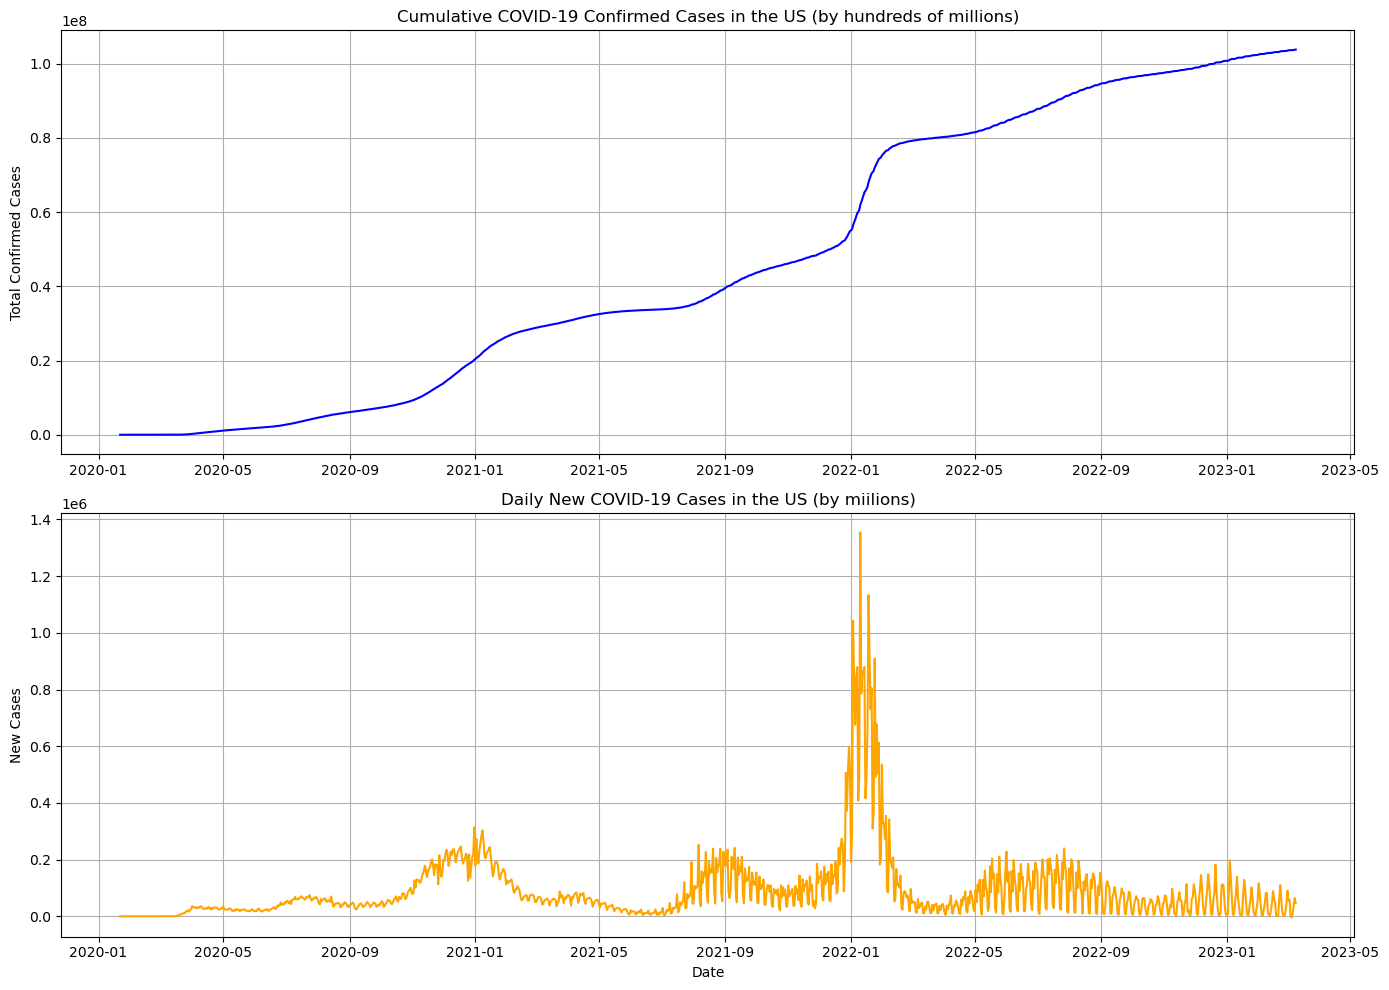

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# --- Plot 1: Cumulative cases ---
plt.subplot(2, 1, 1)  # (nrows, ncols, index)
plt.plot(df_us_cumulative.index, df_us_cumulative.values, color='blue')
plt.title("Cumulative COVID-19 Confirmed Cases in the US (by hundreds of millions)")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)

# --- Plot 2: Daily new cases ---
plt.subplot(2, 1, 2)
plt.plot(daily_cases.index, daily_cases["new_cases_diff_by_day"], color='orange')
plt.title("Daily New COVID-19 Cases in the US (by millions)")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
#covid_confirmed 
#covid_death
covid_recovered 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Compare to New Zealand which was said to have a better resonse to COVID, having one of the lowest death rates to COVID in the world. 



In [20]:
df_nz = covid_confirmed[covid_confirmed['Country/Region'] == 'New Zealand'].drop(columns=['Lat', 'Long', 'Country/Region', 'Province/State'], errors='ignore') # drop columns that are not necessary 
daily_cases_nz = df_nz.sum(axis=0).diff().fillna(0) # difference of cases from col to col
daily_cases_nz.index = pd.to_datetime(daily_cases_nz.index) # columns to actual datetime objects, proper date handling for plotting and modelling
daily_cases_nz = daily_cases_nz.to_frame(name='new_cases_diff_by_day') # daily cases series to df w single col named new_cases

/var/folders/4j/19x2d6rx45sdx8r26vhj6str0000gn/T/ipykernel_30471/3380096095.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  daily_cases_nz.index = pd.to_datetime(daily_cases_nz.index) # columns to actual datetime objects, proper date handling for plotting and modelling


In [21]:
daily_cases_nz

,new_cases_diff_by_day
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2023-03-05,11439.0
2023-03-06,2.0
2023-03-07,0.0
2023-03-08,0.0


In [24]:
df_nz_cumulative = df_nz.sum(axis=0) # add all US rows, cumulative sum
df_nz_cumulative.index = pd.to_datetime(df_nz_cumulative.index)

/var/folders/4j/19x2d6rx45sdx8r26vhj6str0000gn/T/ipykernel_30471/4072935482.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_nz_cumulative.index = pd.to_datetime(df_nz_cumulative.index)


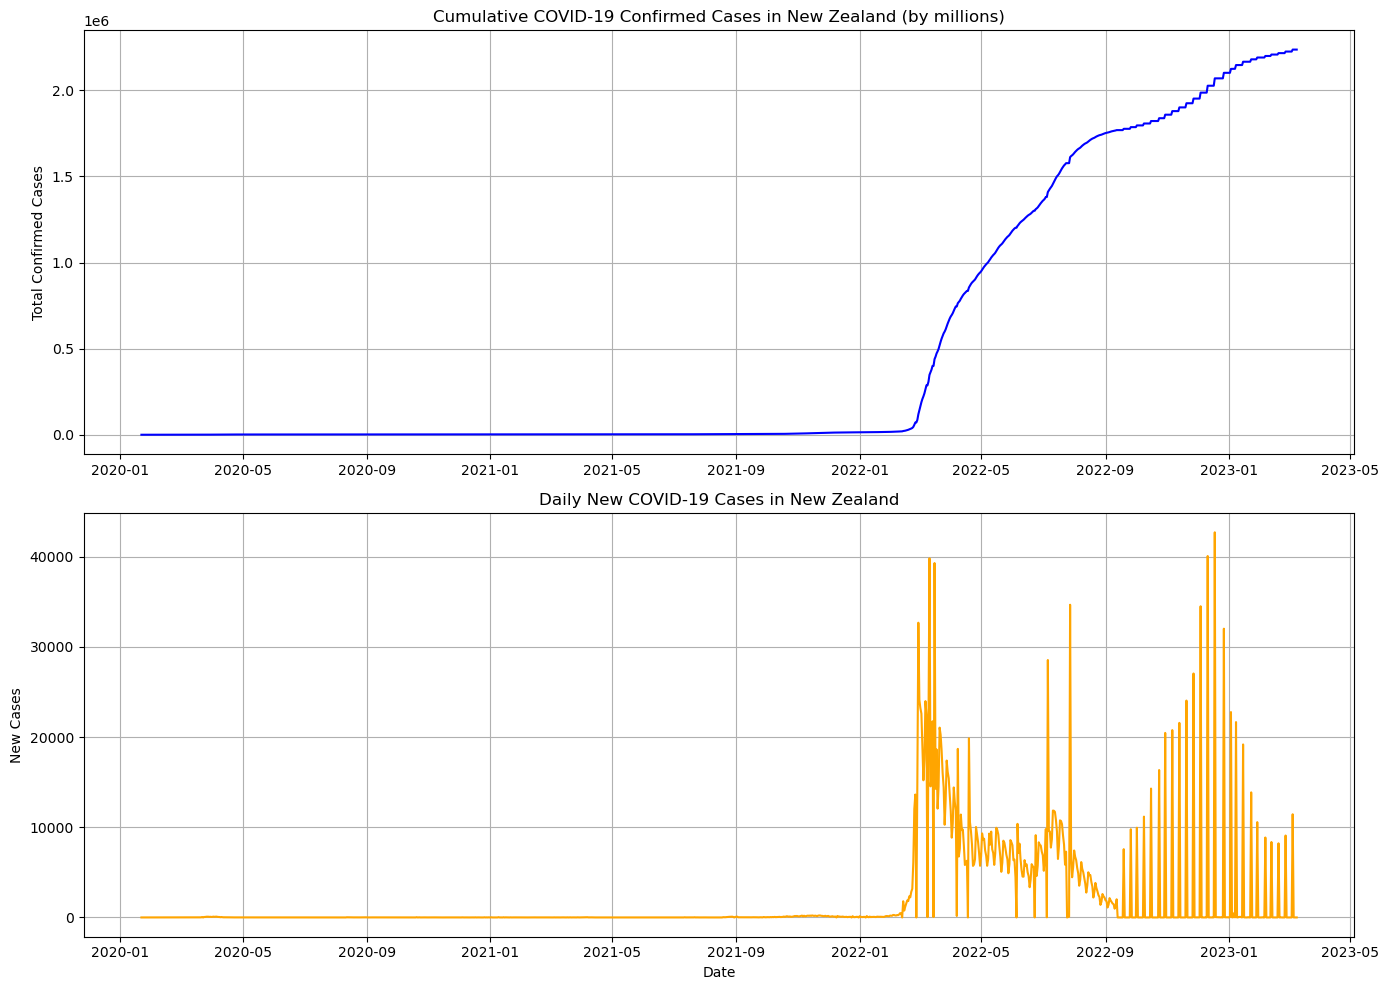

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# --- Plot 1: Cumulative cases ---
plt.subplot(2, 1, 1)  # (nrows, ncols, index)
plt.plot(df_nz_cumulative.index, df_nz_cumulative.values, color='blue')
plt.title("Cumulative COVID-19 Confirmed Cases in New Zealand (by millions)")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)

# --- Plot 2: Daily new cases ---
plt.subplot(2, 1, 2)
plt.plot(daily_cases_nz.index, daily_cases_nz["new_cases_diff_by_day"], color='orange')
plt.title("Daily New COVID-19 Cases in New Zealand")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True)

plt.tight_layout()
plt.show()